In [2]:
import numpy as np
import pandas as pd
nobel = pd.read_csv("https://raw.githubusercontent.com/coderefinery/jupyter/gh-pages/data/nobels.csv")

In [3]:
nobel["share"].describe()

count    967.000000
mean       2.002068
std        0.929166
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: share, dtype: float64

In [4]:
nobel["bornCountryCode"].describe()

count     941
unique     76
top        US
freq      275
Name: bornCountryCode, dtype: object

In [5]:
nobel["born"] = pd.to_datetime(nobel["born"],
                            errors ='coerce')

In [6]:
nobel["age"] = nobel["year"] - nobel["born"].dt.year

In [8]:
nobel[["surname","age"]].head(10)

,surname,age
0,Röntgen,56.0
1,Lorentz,49.0
2,Zeeman,37.0
3,Becquerel,51.0
4,Curie,44.0
5,"Curie, née Sklodowska",36.0
6,"Curie, née Sklodowska",44.0
7,(John William Strutt),62.0
8,von Lenard,43.0
9,Thomson,50.0


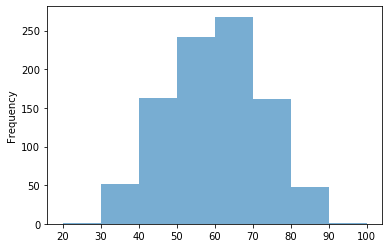

In [9]:
nobel["age"].plot.hist(bins=[20,30,40,50,60,70,80,90,100],alpha=0.6);

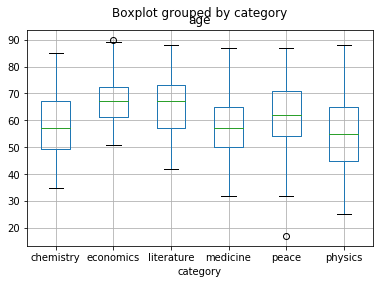

In [10]:
nobel.boxplot(column="age", by="category")

In [11]:
nobel.loc[nobel["bornCountry"] == "Sweden"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
16,17,Nils Gustaf,Dalén,1869-11-30,1937-12-09,Sweden,SE,Stenstorp,Sweden,SE,...,male,1912.0,physics,NaN,1.0,"""for his invention of automatic regulators for...",Swedish Gas-Accumulator Co.,Lidingö-Stockholm,Sweden,43.0
28,29,Karl Manne Georg,Siegbahn,1886-12-03,1978-09-26,Sweden,SE,Lund,Sweden,SE,...,male,1924.0,physics,NaN,1.0,"""for his discoveries and research in the field...",Uppsala University,Uppsala,Sweden,38.0
95,91,Hannes Olof Gösta,Alfvén,1908-05-30,1995-04-02,Sweden,SE,Norrköping,Sweden,SE,...,male,1970.0,physics,NaN,2.0,"""for fundamental work and discoveries in magne...",Royal Institute of Technology,Stockholm,Sweden,62.0
124,120,Kai M.,Siegbahn,1918-04-20,2007-07-20,Sweden,SE,Lund,Sweden,SE,...,male,1981.0,physics,NaN,2.0,"""for his contribution to the development of hi...",Uppsala University,Uppsala,Sweden,63.0
168,162,Svante August,Arrhenius,1859-02-19,1927-10-02,Sweden,SE,Vik,Sweden,SE,...,male,1903.0,chemistry,NaN,1.0,"""in recognition of the extraordinary services ...",Stockholm University,Stockholm,Sweden,44.0
187,183,The (Theodor),Svedberg,1884-08-30,1971-02-25,Sweden,SE,Fleräng,Sweden,SE,...,male,1926.0,chemistry,NaN,1.0,"""for his work on disperse systems""",Uppsala University,Uppsala,Sweden,42.0
217,208,Arne Wilhelm Kaurin,Tiselius,1902-08-10,1971-10-29,Sweden,SE,Stockholm,Sweden,SE,...,male,1948.0,chemistry,NaN,1.0,"""for his research on electrophoresis and adsor...",Uppsala University,Uppsala,Sweden,46.0
320,305,Allvar,Gullstrand,1862-06-05,1930-07-28,Sweden,SE,Landskrona,Sweden,SE,...,male,1911.0,medicine,NaN,1.0,"""for his work on the dioptrics of the eye""",Uppsala University,Uppsala,Sweden,49.0
378,359,Axel Hugo Theodor,Theorell,1903-07-06,1982-08-15,Sweden,SE,Linköping,Sweden,SE,...,male,1955.0,medicine,NaN,1.0,"""for his discoveries concerning the nature and...","Karolinska Institutet, Nobel Medical Institute",Stockholm,Sweden,52.0
415,395,Ulf,von Euler,1905-02-07,1983-03-09,Sweden,SE,Stockholm,Sweden,SE,...,male,1970.0,medicine,NaN,3.0,"""for their discoveries concerning the humoral ...",Karolinska Institutet,Stockholm,Sweden,65.0


In [12]:
nobel["number"] = 1.0

In [13]:
countries = np.array(["Sweden", "United Kingdom", "France", "Denmark"])
nobel2 = nobel.loc[nobel['bornCountry'].isin(countries)]

In [14]:
table = nobel2.pivot_table(values="number", index="bornCountry",
                           columns="category", aggfunc=np.sum)
table

category,chemistry,economics,literature,medicine,peace,physics
bornCountry,,,,,,
Denmark,1.0,NaN,4.0,3.0,1.0,2.0
France,10.0,3.0,11.0,12.0,9.0,8.0
Sweden,4.0,2.0,7.0,7.0,5.0,4.0
United Kingdom,22.0,7.0,6.0,26.0,5.0,22.0


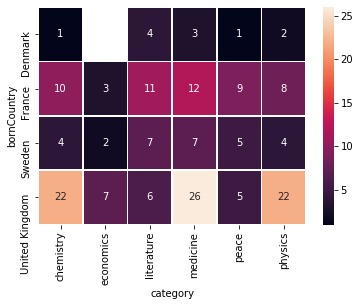

In [16]:
import seaborn as sns
sns.heatmap(table,linewidths=.5, annot=True);